In [1]:
import sys; print('Sys ---', sys.version)
import numpy as np; print('Numpy ---', np.__version__)
import scipy; print('SciPy ---', scipy.__version__)
import sklearn; print('Sklearn version ---', sklearn.__version__)
from sklearn import metrics
import pandas as pd; print('Pandas version ---', pd.__version__)
import statsmodels; print('Statsmodels version ---', statsmodels.__version__)
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima
import pip; print('Pip version ---', pip.__version__)
import itertools 
import seaborn as sns; print('Seaborn ---', sns.__version__)
import matplotlib; print('MatPlotLib ---',matplotlib.__version__)
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

Sys --- 3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]
Numpy --- 1.20.2
SciPy --- 1.4.1
Sklearn version --- 0.24.1
Pandas version --- 1.2.3
Statsmodels version --- 0.12.2
Pip version --- 21.0.1
Seaborn --- 0.11.1
MatPlotLib --- 3.4.1


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
flight_data = sns.load_dataset('flights')
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
flight_data_pivot = flight_data.pivot('month','year','passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


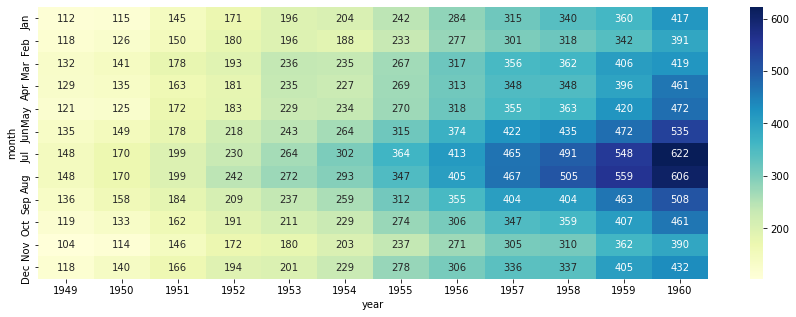

In [5]:
plt.figure(figsize = (15,5))
sns.heatmap(flight_data_pivot,annot =True, fmt = 'd',cmap = 'YlGnBu')
plt.show();

In [6]:
month = pd.date_range('19490131',periods = 144, freq = 'M')
flight_data['datestamp'] = month
flight_data.head()

,year,month,passengers,datestamp
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [7]:
data = flight_data[['datestamp','passengers']]
data.set_index('datestamp',inplace = True)
data.head()
data.describe()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


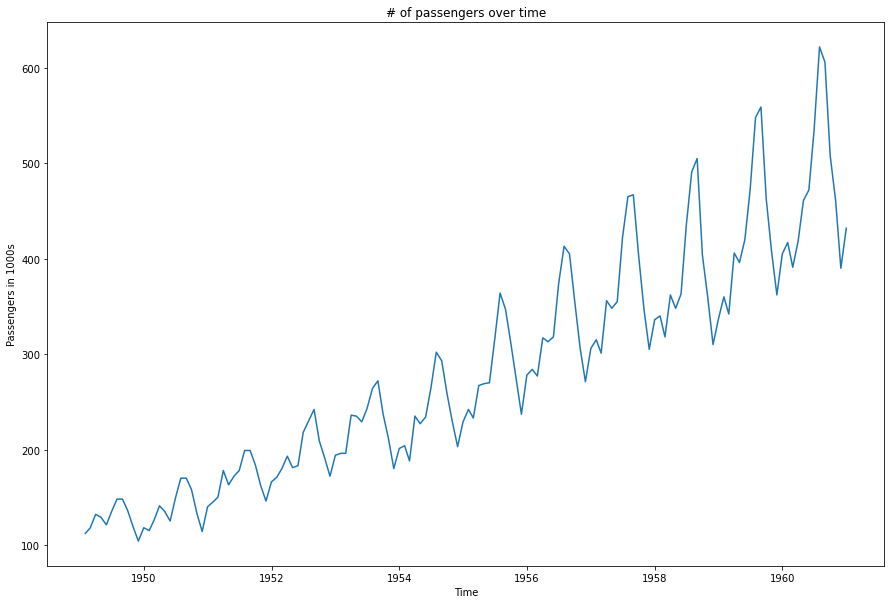

In [8]:
plt.figure(figsize = (15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000s')
plt.title('# of passengers over time')
plt.show();

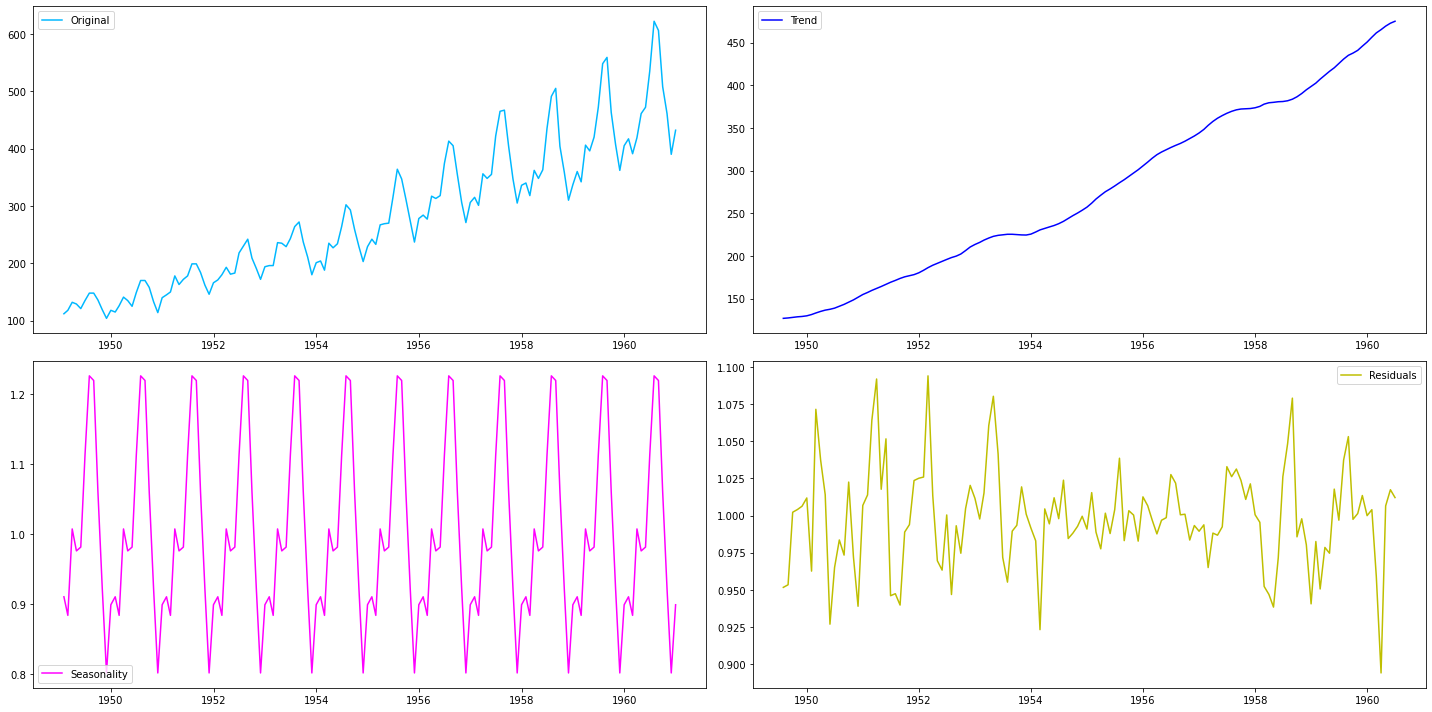

In [9]:
decomposition = seasonal_decompose(data,model = 'multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (20,10))

plt.subplot(221)
plt.plot(data, color = '#00b8ff', label = 'Original')
plt.legend(loc = 'best')
plt.subplot(222)
plt.plot(trend, 'b', label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(223)
plt.plot(seasonal, color = '#ff00ff', label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(224)
plt.plot(residual, 'y', label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show();

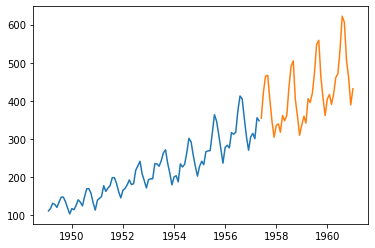

In [10]:
train, test = data[:100], data[100:]

plt.plot(train)
plt.plot(test)
plt.show();

In [11]:
Arima_model = auto_arima(train, start_p = 1, start_q = 1, max_p = 8, max_q = 8,
                         start_P = 0, start_Q = 0, max_P = 8, max_Q = 8,
                         m = 12, seasonal = True, trace = True, d = 1, D = 1,
                         error_action = 'warn', suppress_warnings = True,
                         stepwise = True, n_fits = 30)
Arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=647.341, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -319.101
Date:                            Thu, 01 Apr 2021   AIC                            644.203
Time:                                    21:44:45   BIC                            651.601
Sample:                                         0   HQIC                           647.182
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2434      0.097     -2.512      0.012      -0.433      -0.054
ar.S.L12      -0.2127      0.087     -2.432      0.015      -0.384      -0.041
sigma2        89.1842     14.080      6.334      0.000      61.587     116.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.97   Prob(JB):                         0.30
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

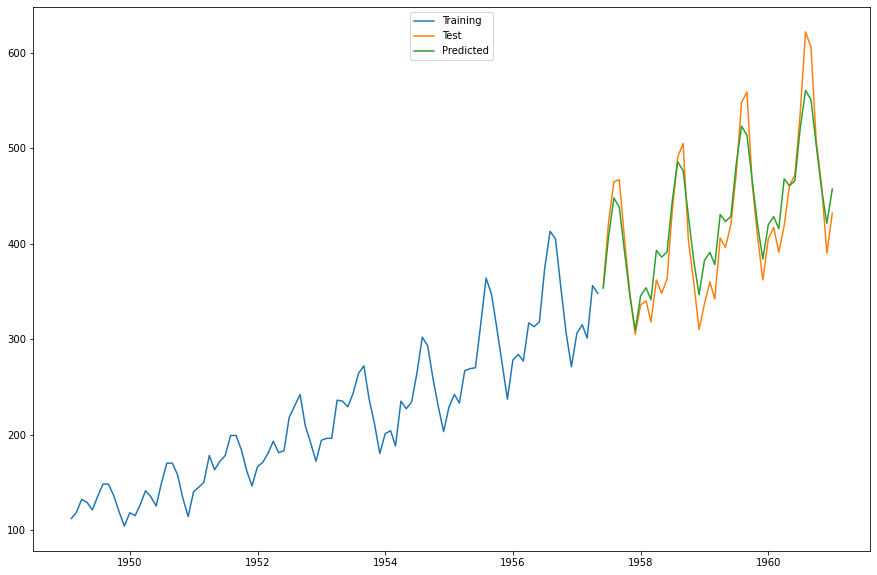

In [12]:
prediction = pd.DataFrame(Arima_model.predict(n_periods = 44), index = test.index)
prediction.columns = ['PredictedPassengers']

plt.figure(figsize = (15,10))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc = 'upper center')
plt.show();

In [13]:
test = test.join(prediction)
test['Error'] = test['passengers'] - test['PredictedPassengers']
metrics.mean_absolute_error(test.passengers, test.PredictedPassengers)
metrics.mean_squared_error(test.passengers, test.PredictedPassengers)
metrics.median_absolute_error(test.passengers, test.PredictedPassengers)

21.538631295496867

686.7476366732086

22.334088582343185

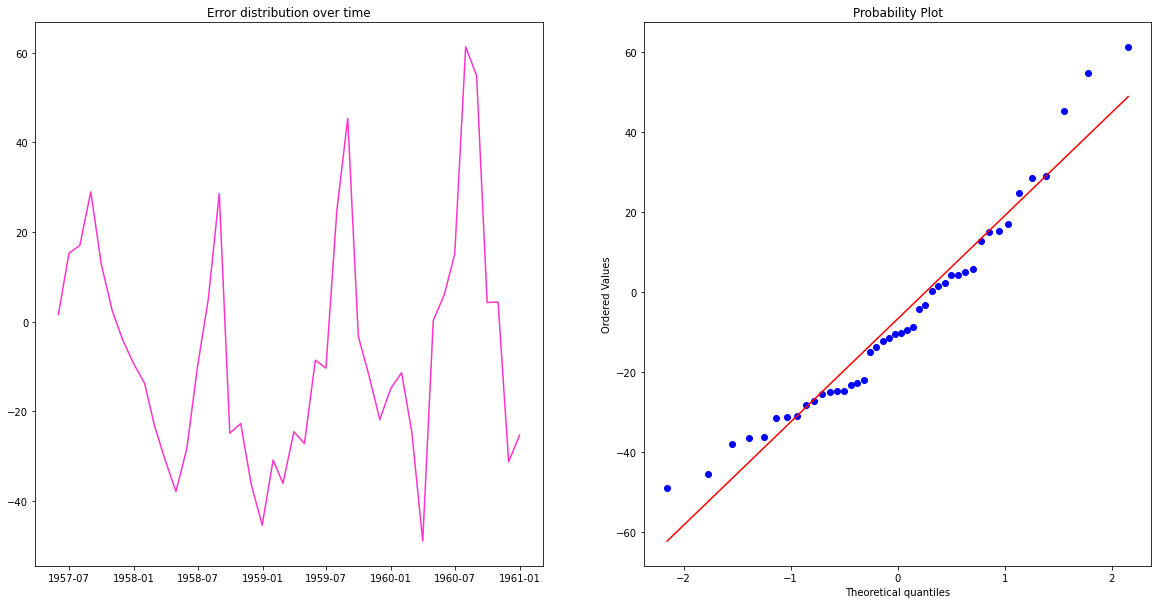

C:\Users\rajin\anaconda3\envs\Learning\lib\site-packages\pandas\plotting\_matplotlib\misc.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


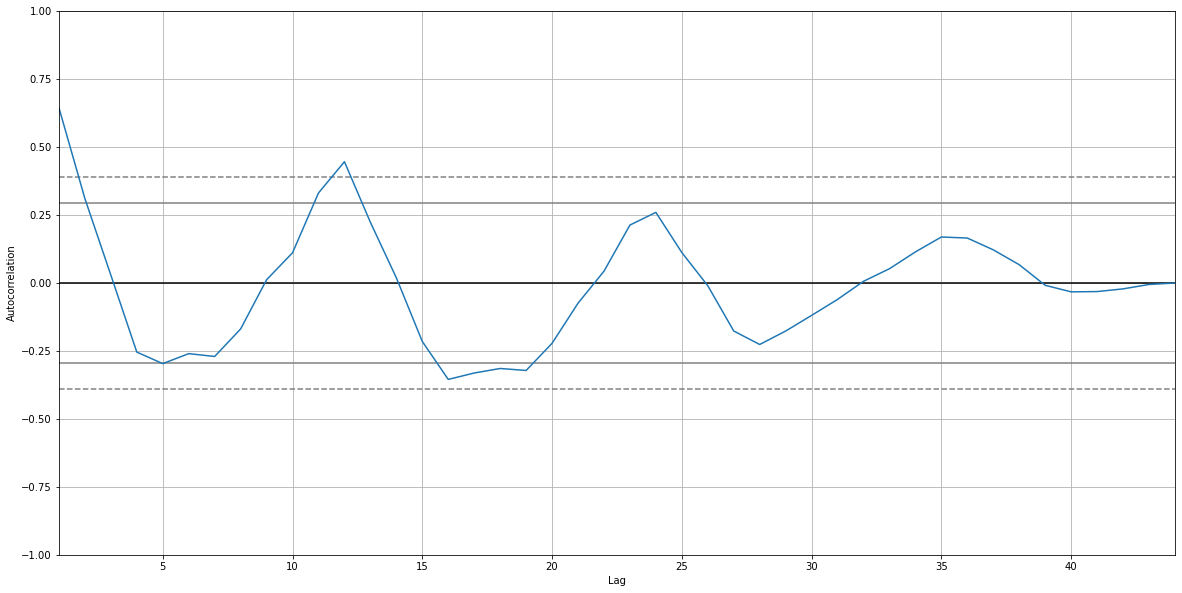

In [14]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.plot(test.Error, color = '#ff33CC')
plt.title('Error distribution over time')
plt.subplot(122)
scipy.stats.probplot(test.Error, plot = plt)
plt.show();

plt.figure(figsize = (20,10))
pmdarima.autocorr_plot(test.Error)
plt.show();